# Network Analysis with Python 


This notebook contains exercises for getting started with network analysis in Python. The main topics we will cover in this class are:
1. Analysing a network
2. Plotting a network

In [1]:
# Install Networkx
! pip install networkx 

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [6]:
#Quick snapshot of the Network
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [6]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

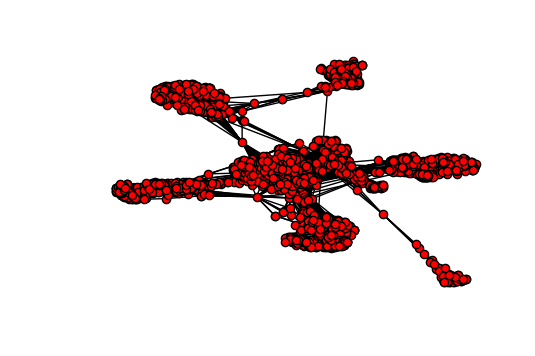

In [7]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)

In [8]:
# What is the average clustering of the nodes in this graph?
# What is the average shortest path length?
# Do this make it a small-world like network? Is this what you would expect?

In [9]:
#  (a) G_fb is the object 
nx.average_clustering(G_fb)

0.6055467186200871

In [28]:
nx.path_graph(4)

In [26]:
# exercise
nx.k_nearest_neighbors(G_fb)

{1: 478.02666666666664,
 2: 260.5408163265306,
 3: 203.87813620071685,
 4: 142.31060606060606,
 5: 147.1290322580645,
 6: 120.46088435374149,
 7: 96.3862973760933,
 8: 93.57882882882883,
 9: 89.59777777777778,
 10: 86.40842105263158,
 11: 85.54882154882155,
 12: 85.67581300813008,
 13: 75.83739045764362,
 14: 74.16420361247947,
 15: 71.15345911949686,
 16: 72.2736280487805,
 17: 73.00773993808049,
 18: 65.89421613394217,
 19: 69.64473684210526,
 20: 68.70555555555555,
 21: 74.48717948717949,
 22: 73.17388167388168,
 23: 70.6078753076292,
 24: 66.1138888888889,
 25: 77.11781818181818,
 26: 64.35576923076923,
 27: 74.34315948601663,
 28: 74.0492277992278,
 29: 78.41470054446461,
 30: 70.41416666666667,
 31: 77.31748726655348,
 32: 68.54758522727273,
 33: 72.87272727272727,
 34: 72.12380300957592,
 35: 73.22063492063492,
 36: 80.7015503875969,
 37: 66.47391577624136,
 38: 66.5035885167464,
 39: 68.28647214854111,
 40: 78.10648148148148,
 41: 80.54499579478554,
 42: 79.4920634920635,
 43: 

In [37]:
# exercise
# (b) average shortest path length
nx.path_graph(4)




In [38]:
from multiprocessing import Pool
import itertools

In [39]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [40]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [41]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

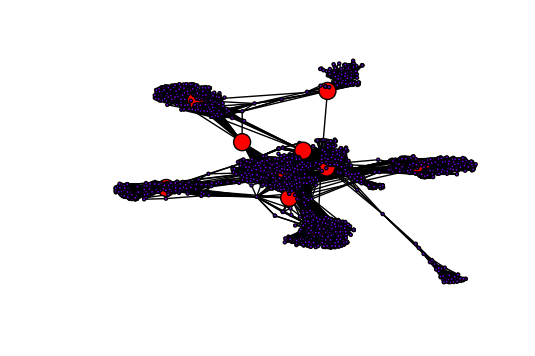

In [42]:

bt = between_parallel(G_fb)
top = 10

max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)


## Extra Tasks##

see NetworkX documentation here https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.html

1. Find the k-clique communities in this network
2. What is the centrality of node 14?
3. Run a hive plot of the data with 2 k-clique communities as the dimensions (follow  https://github.com/ericmjl/hiveplot)